In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from glob import glob
from os import path
sns.set()

In [61]:
sns.set_context('paper', font_scale=0.73)
sns.set_style('whitegrid', {'font.family':'serif', 'font.serif':'Times New Roman'})

In [64]:
control_idx = 575

#
# graph 2
#
x_, y_ = [], []
fracs = [1, 2, 4, 8, 16, 32, 64, 128, 256]
    
for j in range(1, 6):
    d = './scores/unicode_strength_70M_%d/' % j
    for f in fracs:
        input_fn = path.join(d, 'scores:%d.csv' % f)
        try:
            df = pd.read_csv(input_fn, header=None)
            df.columns = ['group', 'used?', 'loss']
        except:
            continue

        ts_len = len(df[df['used?'] == 0])
        test_statistic = df[df['used?'] == 0]['loss'].mean()
        print(ts_len)


        samples = []
        for i in range(1, 300):
            assert(ts_len == len(df.iloc[range(i,len(df),301)]))
            assert(1 == len(df.iloc[range(i,len(df),301)]['used?'].unique()))
            samples.append(df.iloc[range(i,len(df),301)]['loss'].mean())
        z_score = (test_statistic - np.mean(samples)) / np.std(samples)
        x_.append(f), y_.append(z_score)
        print(f, test_statistic, np.mean(samples), np.std(samples), z_score)

1
1 4.61328125 4.764854201505017 0.08655033779237511 -1.7512693233921734
2
2 2.78076171875 2.8757185409698995 0.04940422570358449 -1.922038466701645
4
4 3.929931640625 4.168581551133988 0.07503763691637251 -3.1804027993972808
8
8 3.8958740234375 4.073445910195443 0.05663456815496935 -3.135397559173621
15
16 3.9170247395833333 4.133778066645764 0.04831640912824779 -4.486122436936391
31
32 3.7420457409274195 3.9611863027126706 0.04420310719060628 -4.957582751825673
63
64 3.5009610615079363 3.7876457922738496 0.044701545642488905 -6.4133068923106515
122
128 3.1242915919569674 3.7026018759380657 0.059882408394543216 -9.657431948475152
245
256 3.0267099808673468 3.6412961825877925 0.0630801305935133 -9.742944346149551
2
2 2.70849609375 2.856920529368729 0.057820736000605465 -2.5669758962800953
4
4 3.6739501953125 3.9410122772522995 0.08097640806756957 -3.29802331707469
8
8 3.81817626953125 4.107315114509301 0.07094030368259939 -4.075805007428703
15
16 3.791731770833333 4.098164454431439 0.0

1 -8.671175499113874 2.999827237465836 3.380278707236312 0.043875420329037844
1 -7.625925872592993 2.87466301771818 3.3829911486609188 0.06665789039067797
1 -8.214000373621914 2.948362521225366 3.4022142031599674 0.055253428450293365
8 -6.511910517022206 3.1440127609421102 3.375516203757554 0.03555077149943804
8 -6.665191531090488 3.010492004919737 3.3391713471198514 0.049312812792693984
8 -6.525276878353074 3.0917503317766197 3.3823521596593933 0.044534788837361804
2 -9.216735819635474 3.0081760167675156 3.3740940412603186 0.039701476927791045
2 -7.974935889559226 2.856836018918466 3.3286814563342304 0.05916604772127434
2 -8.639262484097737 2.9320192247574264 3.3542738833733985 0.04887623907633492
4 -8.016458093773535 3.0650774078422405 3.362388788873652 0.037087623680380266
4 -7.486854035558497 2.9155776186506834 3.316054012884111 0.053490610653203846
4 -7.655168406697625 2.9944375650428645 3.3571919813060975 0.04738686296513785


Text(0.5, 1.0, '(c) Dataset scaling (loss)')

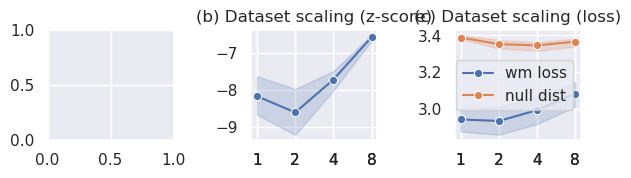

In [60]:
x, y, a, b = [], [], [], []


for d in glob('/home/ryan/haveibeentrainedon/models/unicode_scaling/run/*/70M/0_model/loss_per_token_scored.csv'):
    column_names = [i for i in range(0, 512)]

    ### Read csv
    df = pd.read_csv(d, header=None, delimiter=",", names=column_names)
    
    # dataset size
    x.append(int(d[57]))
    
    # calculate z-score
    num_samples = 300
    samples = []
    for i in range(num_samples+1):
        sample_df = df.iloc[range(i,len(df),num_samples+1)]
        sample = sample_df.drop(0, axis=1).mean(skipna=True).mean(skipna=True)
        samples.append(sample)

    test_statistic = samples.pop(0)
    z_score = (test_statistic - np.mean(samples)) / np.std(samples)
    print(x[-1], z_score, test_statistic, np.mean(samples), np.std(samples))
    y.append(z_score)
    
    a.append(test_statistic)
    b.append(np.mean(samples))

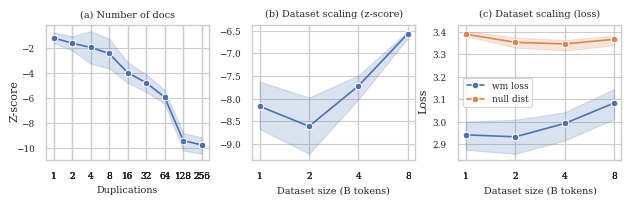

In [90]:
fig, axs = plt.subplots(1, 3, figsize=(6.29,1.8), sharey=False)
fig.tight_layout()

sns.lineplot(ax=axs[0], x=x_, y=y_, marker='o', ci=95)
axs[0].set_xscale('log')
axs[0].minorticks_off()
axs[0].xaxis.set_minor_formatter(mticker.ScalarFormatter())
axs[0].xaxis.set_major_formatter(mticker.ScalarFormatter())
axs[0].set_xticks(ticks=x_, labels=x_)
axs[0].set_xlabel('Duplications')
axs[0].set_title('(a) Number of docs')

sns.lineplot(ax=axs[1], x=x, y=y, marker='o', ci=95)
axs[1].set_xscale('log')
axs[1].minorticks_off()
axs[1].xaxis.set_minor_formatter(mticker.ScalarFormatter())
axs[1].xaxis.set_major_formatter(mticker.ScalarFormatter())
axs[1].set_xticks(ticks=x, labels=x)
axs[1].set_xlabel('Dataset size (B tokens)')
axs[1].set_title('(b) Dataset scaling (z-score)')

sns.lineplot(ax=axs[2], x=x, y=a, marker='o', ci=95, label='wm loss')
sns.lineplot(ax=axs[2], x=x, y=b, marker='o', ci=95, label='null dist')
axs[2].set_xscale('log')
# axs[2].set_yscale('log')
axs[2].minorticks_off()
axs[2].xaxis.set_minor_formatter(mticker.ScalarFormatter())
axs[2].xaxis.set_major_formatter(mticker.ScalarFormatter())
axs[2].set_xticks(ticks=x, labels=x)
axs[2].set_xlabel('Dataset size (B tokens)')
axs[2].set_title('(c) Dataset scaling (loss)')

# fig.text(0.5, -0.00, 'Number of documents contaminated (watermarking with 575 docs)', ha='center', size=8)
fig.text(-0.0, 0.5, 'Z-score', va='center', rotation='vertical', size=8)
fig.text(0.65, 0.5, 'Loss', va='center', rotation='vertical', size=8)
plt.savefig('unicode_scaling.pdf', bbox_inches='tight')